In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns=1000
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\sotha\\Documents\\GitHub\\CM3203-C1615525\\Code'

In [3]:
%%time
train_df = pd.read_csv("train-flattened.csv", dtype={'fullVisitorId':str})#,parse_dates=['date'], date_parser=dateparse)
test_df = pd.read_csv("test-flattened.csv", dtype={'fullVisitorId':str})#,parse_dates=['date'], date_parser=dateparse)
sample_submission = pd.read_csv("../Input/sample_submission_v2.csv")

Wall time: 19.8 s


In [4]:
%%time
print("Dimensions of the data (rows, cloumns):\n")
print('Size of train data', train_df.shape)
print('Size of test data', test_df.shape)
print('Size of sample_submission data', sample_submission.shape)
#export to report

Dimensions of the data (rows, cloumns):

Size of train data (1708337, 30)
Size of test data (401589, 30)
Size of sample_submission data (296530, 2)
Wall time: 0 ns


In [5]:
train_df.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,trafficSource.adContent,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,customDimensions
0,Organic Search,20171016,3162355547410993243,1508198450,1,1508198450,Firefox,desktop,False,Windows,not available in demo dataset,Europe,Germany,not available in demo dataset,(not set),not available in demo dataset,Western Europe,1.0,1,1.0,1.0,NaN,NaN,(not set),NaN,water bottle,organic,NaN,google,"[{'index': '4', 'value': 'EMEA'}]"
1,Referral,20171016,8934116514970143966,1508176307,6,1508176307,Chrome,desktop,False,Chrome OS,Cupertino,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,NaN,2,NaN,2.0,NaN,NaN,(not set),NaN,NaN,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com,"[{'index': '4', 'value': 'North America'}]"
2,Direct,20171016,7992466427990357681,1508201613,1,1508201613,Chrome,mobile,True,Android,not available in demo dataset,Americas,United States,not available in demo dataset,windjammercable.net,not available in demo dataset,Northern America,NaN,2,1.0,2.0,NaN,NaN,(not set),True,NaN,(none),NaN,(direct),"[{'index': '4', 'value': 'North America'}]"
3,Organic Search,20171016,9075655783635761930,1508169851,1,1508169851,Chrome,desktop,False,Windows,not available in demo dataset,Asia,Turkey,not available in demo dataset,unknown.unknown,not available in demo dataset,Western Asia,NaN,2,1.0,2.0,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,"[{'index': '4', 'value': 'EMEA'}]"
4,Organic Search,20171016,6960673291025684308,1508190552,1,1508190552,Chrome,desktop,False,Windows,not available in demo dataset,Americas,Mexico,not available in demo dataset,prod-infinitum.com.mx,not available in demo dataset,Central America,NaN,2,1.0,2.0,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,"[{'index': '4', 'value': 'Central America'}]"


### The attribute data types

In [6]:
print("The data types in columns and missing data are:")
train_df.info()

The data types in columns and missing data are:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708337 entries, 0 to 1708336
Data columns (total 30 columns):
channelGrouping               object
date                          int64
fullVisitorId                 object
visitId                       int64
visitNumber                   int64
visitStartTime                int64
device.browser                object
device.deviceCategory         object
device.isMobile               bool
device.operatingSystem        object
geoNetwork.city               object
geoNetwork.continent          object
geoNetwork.country            object
geoNetwork.metro              object
geoNetwork.networkDomain      object
geoNetwork.region             object
geoNetwork.subContinent       object
totals.bounces                float64
totals.hits                   int64
totals.newVisits              float64
totals.pageviews              float64
totals.transactionRevenue     float64
trafficSource.adContent     

### <a name="individual variable"></a>Extract Descriptive Statistics of Each Column

In [7]:
print("Descriptive statistics of numerical columns:\n")
train_df.describe()

Descriptive statistics of numerical columns:



,date,visitId,visitNumber,visitStartTime,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue
count,1.708337e+06,1.708337e+06,1.708337e+06,1.708337e+06,871578.0,1.708337e+06,1307430.0,1.708098e+06,1.851400e+04
mean,2.017016e+07,1.498352e+09,2.335170e+00,1.498352e+09,1.0,4.429598e+00,1.0,3.696202e+00,1.251132e+08
std,6.485620e+03,1.624937e+07,9.354034e+00,1.624937e+07,0.0,8.991748e+00,0.0,6.473237e+00,4.162653e+08
min,2.016080e+07,1.470035e+09,1.000000e+00,1.470035e+09,1.0,1.000000e+00,1.0,1.000000e+00,1.000000e+04
25%,2.016122e+07,1.482738e+09,1.000000e+00,1.482738e+09,1.0,1.000000e+00,1.0,1.000000e+00,2.306750e+07
50%,2.017071e+07,1.499832e+09,1.000000e+00,1.499832e+09,1.0,1.000000e+00,1.0,1.000000e+00,4.606000e+07
75%,2.017120e+07,1.512513e+09,1.000000e+00,1.512513e+09,1.0,4.000000e+00,1.0,4.000000e+00,1.000000e+08
max,2.018043e+07,1.525158e+09,4.570000e+02,1.525158e+09,1.0,5.000000e+02,1.0,5.000000e+02,2.312950e+10


In [8]:
print("Descriptive statistics of categorical columns")


Descriptive statistics of categorical columns


In [9]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [10]:
print("Missing data:\n")
missing_data(train_df)

Missing data:



,Total,Percent
totals.transactionRevenue,1689823,98.916256
trafficSource.adContent,1643600,96.210525
trafficSource.isTrueDirect,1173819,68.711209
trafficSource.referralPath,1142073,66.852910
trafficSource.keyword,1052780,61.626014
totals.bounces,836759,48.980910
totals.newVisits,400907,23.467676
totals.pageviews,239,0.013990
visitNumber,0,0.000000
device.isMobile,0,0.000000


## <a name="individual variables"></a>Explore Individual Variables

In [11]:
train_df.nunique()

channelGrouping                     8
date                              638
fullVisitorId                 1323730
visitId                       1665802
visitNumber                       457
visitStartTime                1667423
device.browser                    129
device.deviceCategory               3
device.isMobile                     2
device.operatingSystem             24
geoNetwork.city                   956
geoNetwork.continent                6
geoNetwork.country                228
geoNetwork.metro                  123
geoNetwork.networkDomain        41982
geoNetwork.region                 483
geoNetwork.subContinent            23
totals.bounces                      1
totals.hits                       297
totals.newVisits                    1
totals.pageviews                  230
totals.transactionRevenue        7251
trafficSource.adContent            76
trafficSource.campaign             33
trafficSource.isTrueDirect          1
trafficSource.keyword            4546
trafficSourc

### Explore the target variable

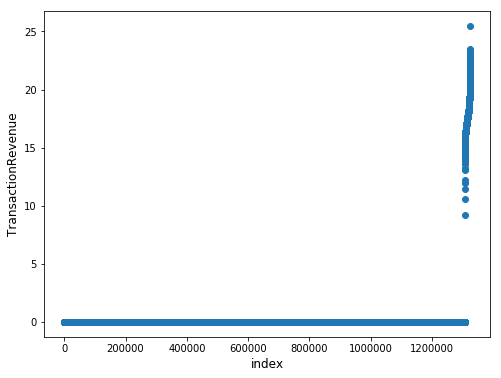

In [12]:
train_df["totals.transactionRevenue"] = train_df["totals.transactionRevenue"].astype('float')
temp = train_df.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(temp.shape[0]), np.sort(np.log1p(temp["totals.transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

In [13]:
nonzero_tR = pd.notnull(train_df["totals.transactionRevenue"]).sum()
u_nonzero_tR = (temp["totals.transactionRevenue"]>0).sum()
print("Number of instances in train set with non-zero revenue : ", nonzero_tR, "| Ratio : ", nonzero_tR / train_df.shape[0])
print("Number of unique customers with non-zero revenue : ", u_nonzero_tR, "| Ratio: ", u_nonzero_tR / temp.shape[0])

Number of instances in train set with non-zero revenue :  18514 | Ratio :  0.010837440153786987
Number of unique customers with non-zero revenue :  16141 | Ratio:  0.012193574218307359


In [14]:
print("Number of unique visitors in train set : ",train_df.fullVisitorId.nunique(), " out of ",train_df.shape[0], 'rows.')
#print("Number of unique visitors in train set : ",test_df.fullVisitorId.nunique(), " out of ",test_df.shape[0], 'rows.')
print("Number of common visitors in train and test set : ",len(set(train_df.fullVisitorId.unique()).intersection(set(test_df.fullVisitorId.unique())) ))

Number of unique visitors in train set :  1323730  out of  1708337 rows.
Number of common visitors in train and test set :  2759


In [15]:
y = np.nan_to_num(np.array([float(i) for i in train_df['totals.transactionRevenue']]))
print('The ratio of customers with transaction revenue is', str((y != 0).mean()))

The ratio of customers with transaction revenue is 0.010837440153786987


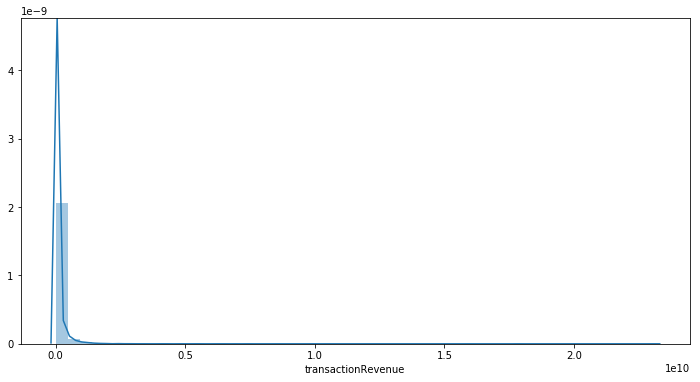

In [16]:
plt.figure(figsize=[12, 6])
sns.distplot(y[y!=0])
plt.xlabel('transactionRevenue')
plt.show()

In [17]:
# target variable distribution
# nat.log of sum for total transaction revenue per user
target_var = np.log1p(train_df.groupby("fullVisitorId")["totals.transactionRevenue"].sum())

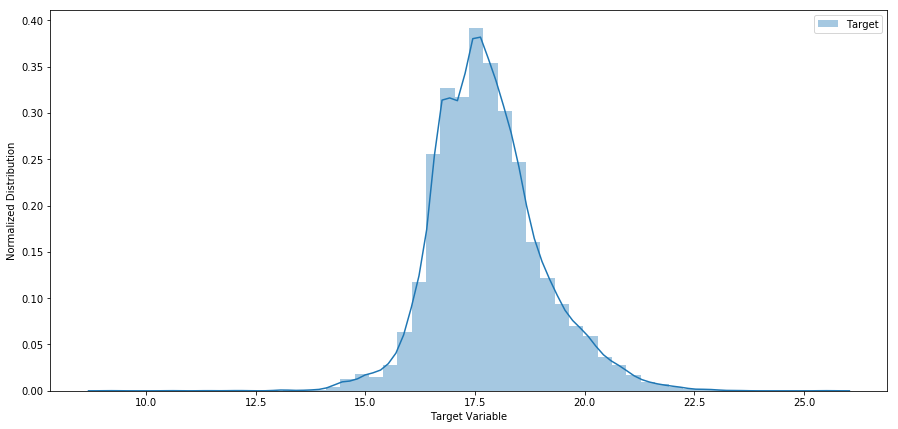

In [18]:
plt.subplots(figsize=(15,7))
sns.distplot(target_var[target_var != 0], label='Target').legend()
plt.xlabel('Target Variable')
plt.ylabel('Normalized Distribution')
plt.show()

## Categorical Data Exploration

In [19]:
# Explore Categorical Data

train_df.select_dtypes(include='object').columns.tolist()

['channelGrouping',
 'fullVisitorId',
 'device.browser',
 'device.deviceCategory',
 'device.operatingSystem',
 'geoNetwork.city',
 'geoNetwork.continent',
 'geoNetwork.country',
 'geoNetwork.metro',
 'geoNetwork.networkDomain',
 'geoNetwork.region',
 'geoNetwork.subContinent',
 'trafficSource.adContent',
 'trafficSource.campaign',
 'trafficSource.isTrueDirect',
 'trafficSource.keyword',
 'trafficSource.medium',
 'trafficSource.referralPath',
 'trafficSource.source',
 'customDimensions']

In [20]:
# Define a function to plot the count of categorical variables (in ratio)
# Credit: https://www.kaggle.com/sz8416/lb-1-4439-gacr-prediction-eda-lgb-baseline

def plot_categorical(data, col, size=[15, 5], xlabel_angle=0, title='', max_cat = None):
    '''use this for ploting the count of categorical features'''
    plotdata = data[col].value_counts() / len(data)
    if max_cat != None:   # if there is maximum number of variables (coz too many variables)
        plotdata = plotdata[max_cat[0]:max_cat[1]]
    plt.figure(figsize = size)
    ax = sns.barplot(x = plotdata.index, y=plotdata.values)
    plt.title(title, fontsize=15)
    if xlabel_angle!=0: 
        plt.xticks(rotation=xlabel_angle)
    ax.set_xticklabels(data[col].value_counts().index.tolist(), fontsize=11)
    plt.ylabel('Ratio', fontsize=15)
    plt.show()

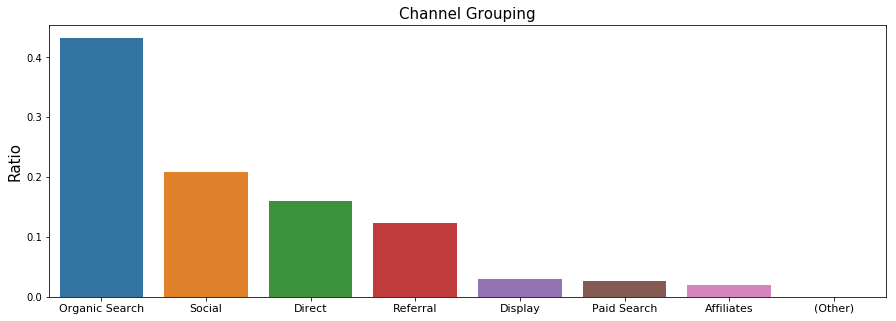

In [21]:
plot_categorical(data=train_df, col='channelGrouping', xlabel_angle=0, title='Channel Grouping', max_cat=[0, 10])

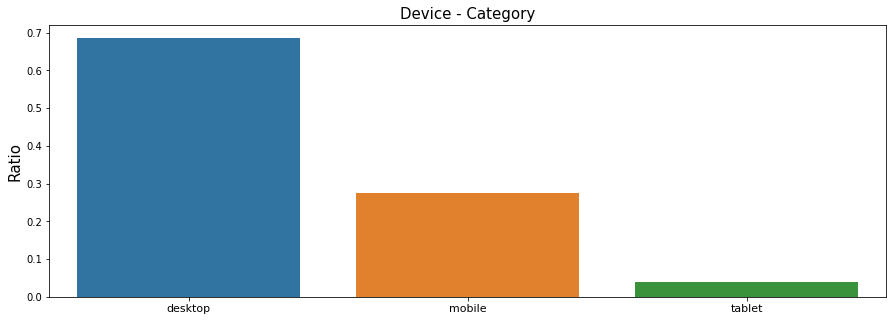

In [22]:
plot_categorical(data=train_df, col='device.deviceCategory', xlabel_angle=0, title='Device - Category', max_cat=[0, 10])

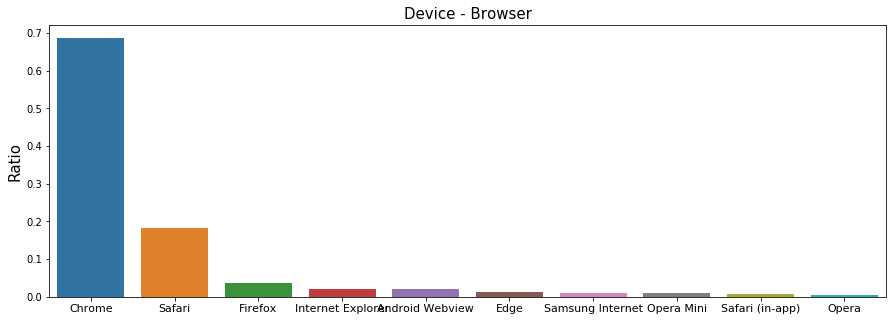

In [23]:
plot_categorical(data=train_df, col='device.browser', xlabel_angle=0, title='Device - Browser', max_cat=[0, 10])

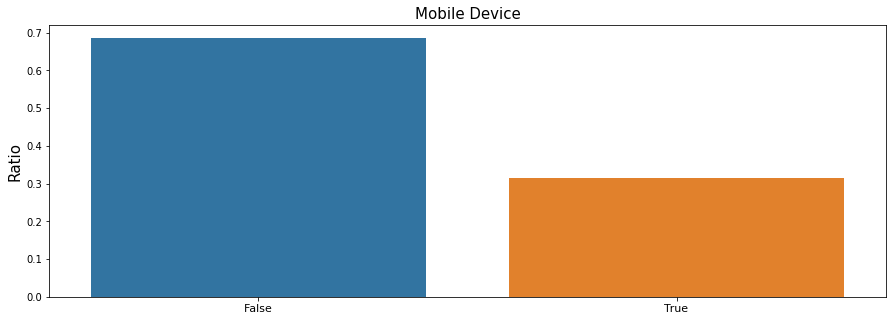

In [24]:
plot_categorical(data=train_df, col='device.isMobile', xlabel_angle=0, title='Mobile Device', max_cat=[0, 10])

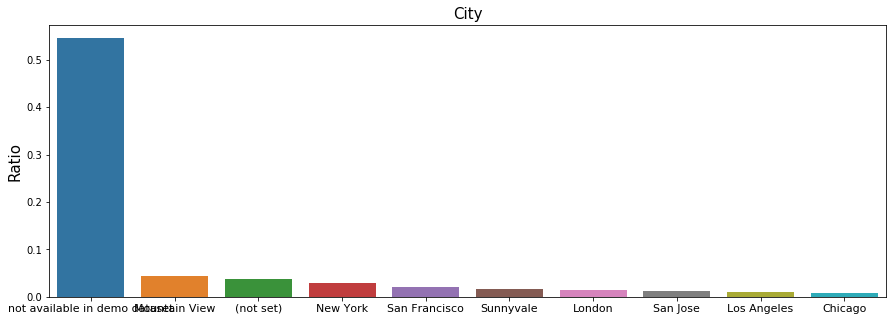

In [25]:
plot_categorical(data=train_df, col='geoNetwork.city', xlabel_angle=0, title='City', max_cat=[0, 10])

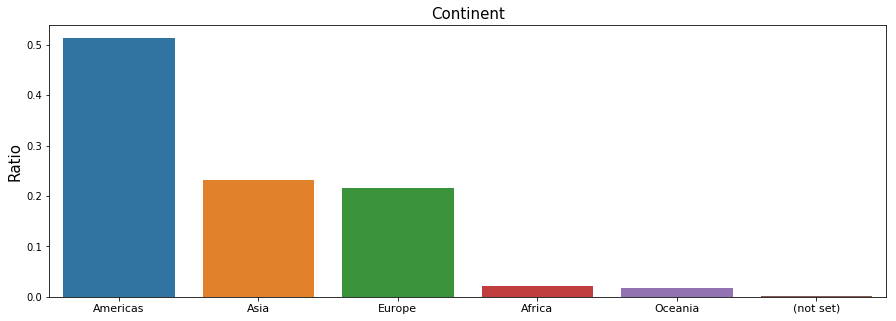

In [26]:
plot_categorical(data=train_df, col='geoNetwork.continent', xlabel_angle=0, title='Continent', max_cat=[0, 10])

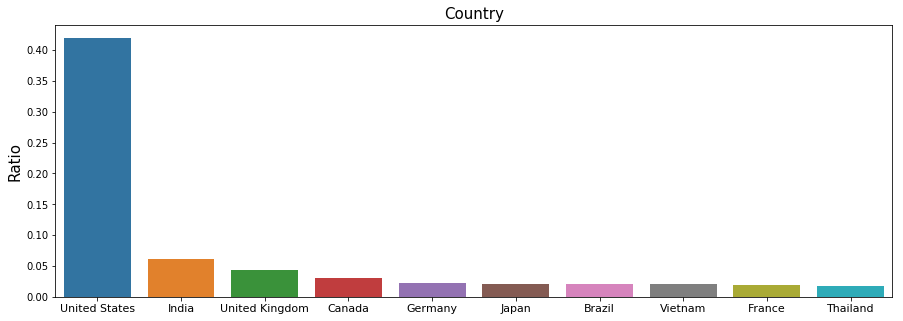

In [27]:
plot_categorical(data=train_df, col='geoNetwork.country', xlabel_angle=0, title='Country', max_cat=[0, 10])

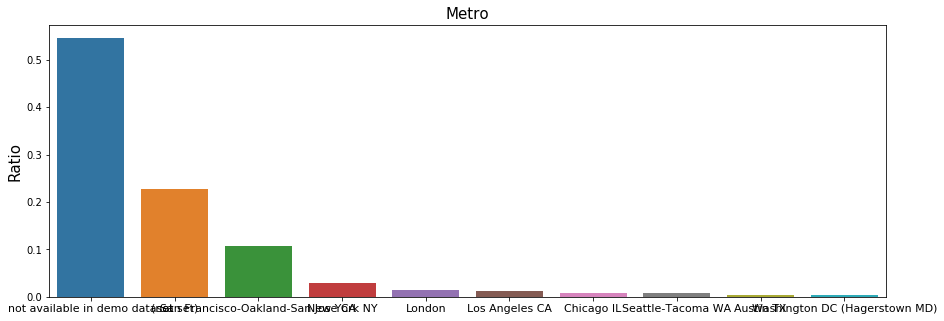

In [28]:
plot_categorical(data=train_df, col='geoNetwork.metro', xlabel_angle=0, title='Metro', max_cat=[0, 10])

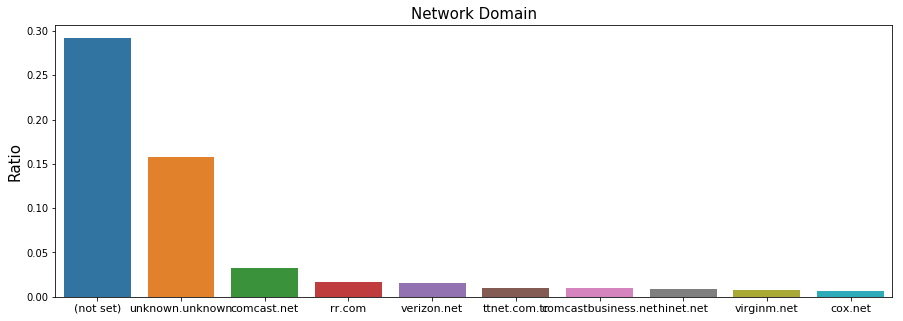

In [29]:
plot_categorical(data=train_df, col='geoNetwork.networkDomain', xlabel_angle=0, title='Network Domain', max_cat=[0, 10])

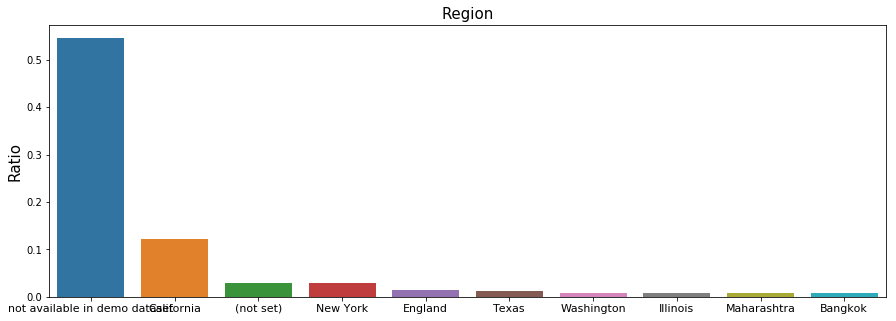

In [30]:
plot_categorical(data=train_df, col='geoNetwork.region', xlabel_angle=0, title='Region', max_cat=[0, 10])

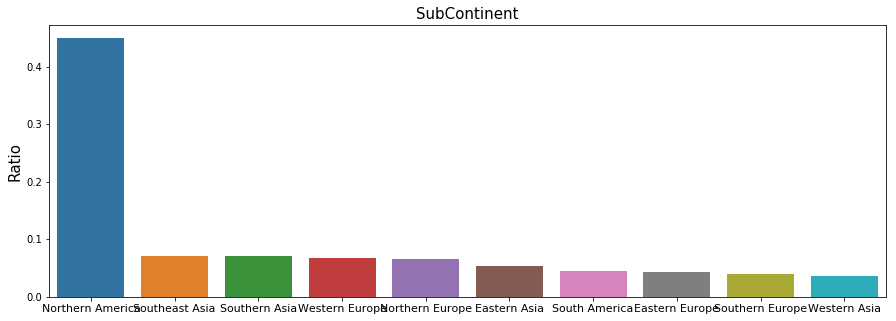

In [31]:
plot_categorical(data=train_df, col='geoNetwork.subContinent', xlabel_angle=0, title='SubContinent', max_cat=[0, 10])

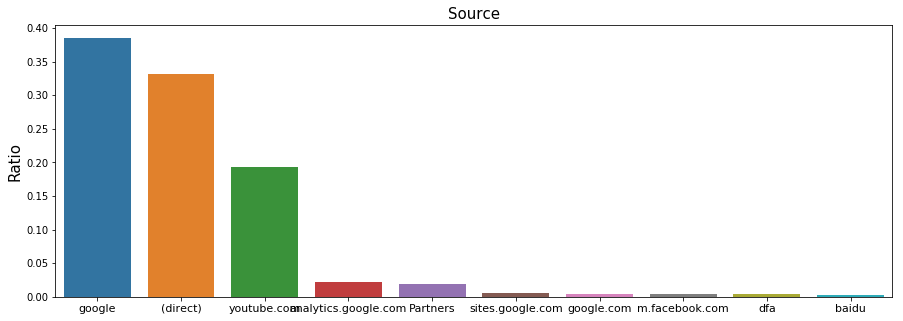

In [32]:
plot_categorical(data=train_df, col='trafficSource.source', xlabel_angle=0, title='Source', max_cat=[0, 10])

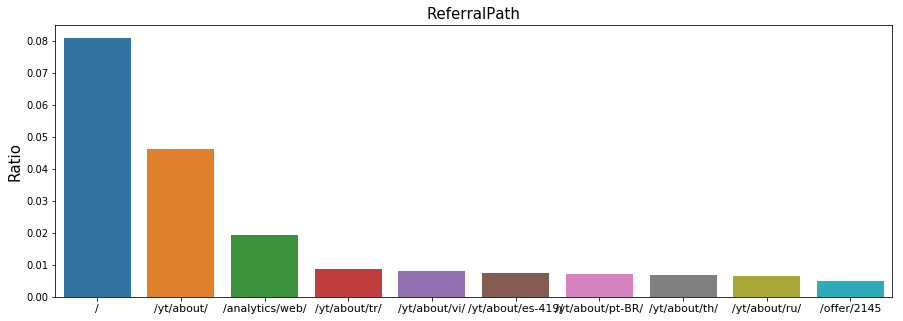

In [33]:
plot_categorical(data=train_df, col='trafficSource.referralPath', xlabel_angle=0, title='ReferralPath', max_cat=[0, 10])

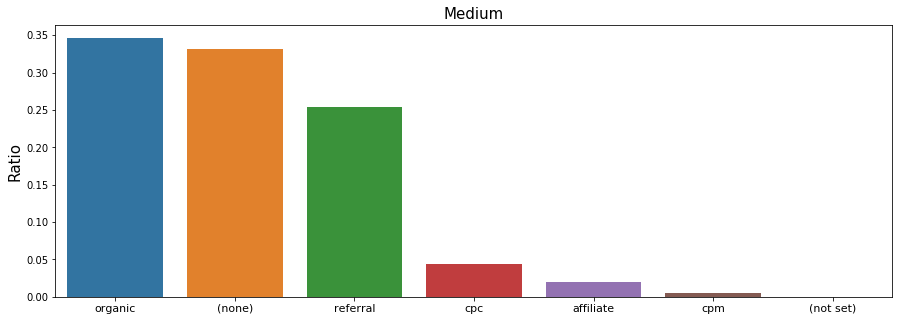

In [34]:
plot_categorical(data=train_df, col='trafficSource.medium', xlabel_angle=0, title='Medium', max_cat=[0, 10])

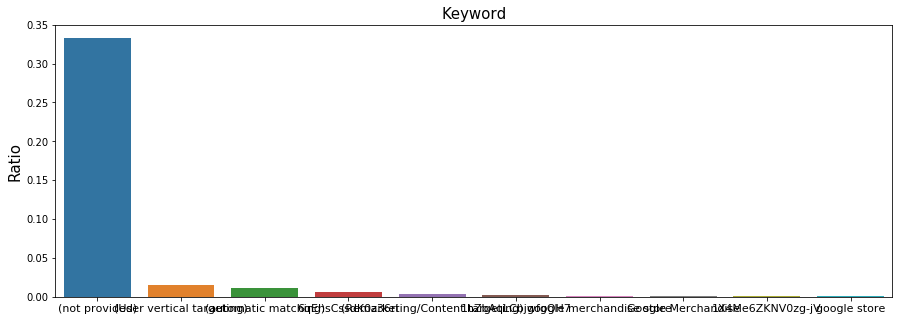

In [35]:
plot_categorical(data=train_df, col='trafficSource.keyword', xlabel_angle=0, title='Keyword', max_cat=[0, 10])

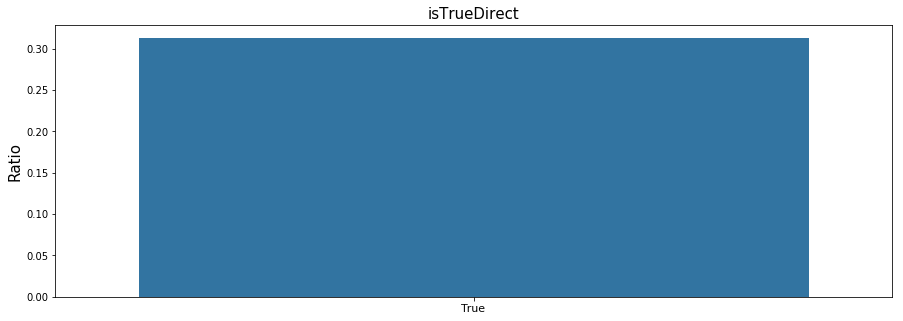

In [36]:
plot_categorical(data=train_df, col='trafficSource.isTrueDirect', xlabel_angle=0, title='isTrueDirect', max_cat=[0, 10])

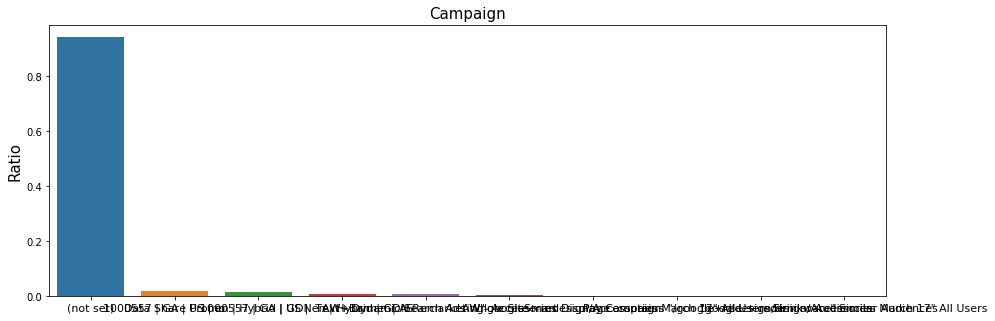

In [37]:
plot_categorical(data=train_df, col='trafficSource.campaign', xlabel_angle=0, title='Campaign', max_cat=[0, 10])

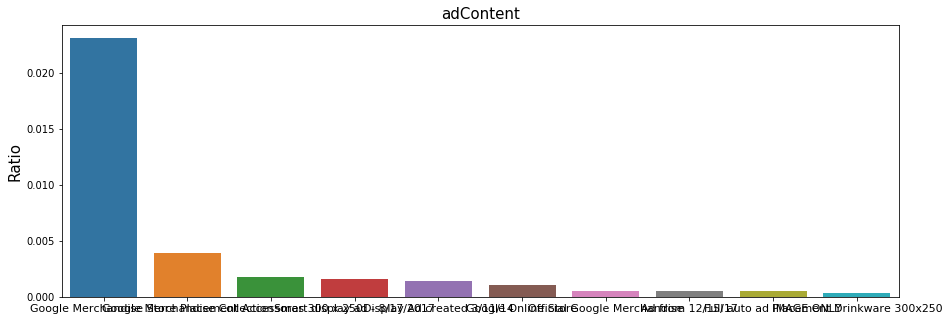

In [38]:
plot_categorical(data=train_df, col='trafficSource.adContent', xlabel_angle=0, title='adContent', max_cat=[0, 10])

## Numerical Value Exploration

In [39]:
# Numerical Value Exploration

#device.isMobile already plotted before

train_df.select_dtypes(include=['float64', 'int32', 'int64']).columns.tolist()

['date',
 'visitId',
 'visitNumber',
 'visitStartTime',
 'totals.bounces',
 'totals.hits',
 'totals.newVisits',
 'totals.pageviews',
 'totals.transactionRevenue']

### Totals

In [40]:
train_df['totals.bounces'].value_counts()

1.0    871578
Name: totals.bounces, dtype: int64

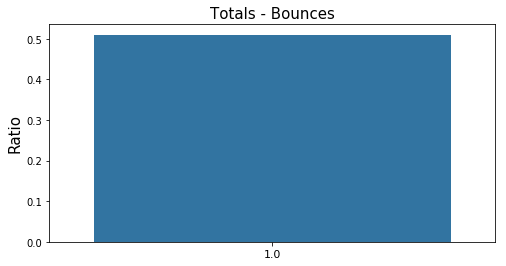

In [41]:
plot_categorical(data=train_df, col='totals.bounces', size=[8 ,4], xlabel_angle=0, title='Totals - Bounces')

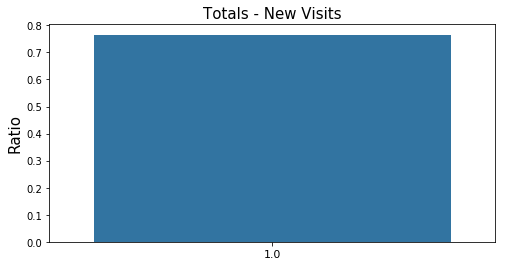

In [42]:
plot_categorical(data=train_df, col='totals.newVisits', size=[8 ,4], xlabel_angle=0, title='Totals - New Visits')

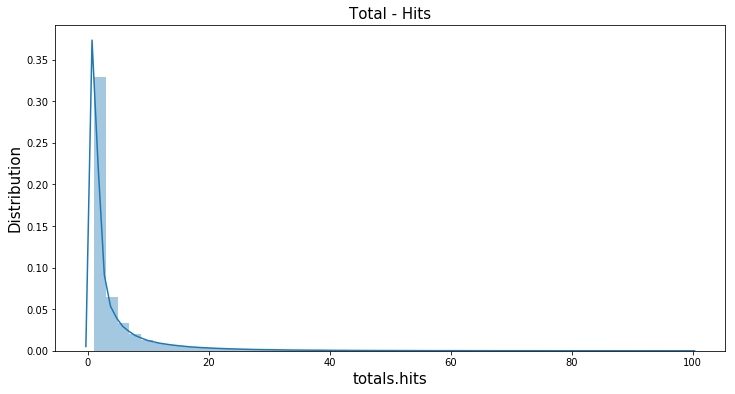

In [43]:
plt.figure(figsize=[12, 6])
sns.distplot(train_df['totals.hits'][train_df['totals.hits'] < 100])
plt.xlabel('totals.hits', fontsize=15)
plt.ylabel('Distribution', fontsize=15)
plt.title('Total - Hits', fontsize=15)
plt.show()

ValueError: cannot convert float NaN to integer

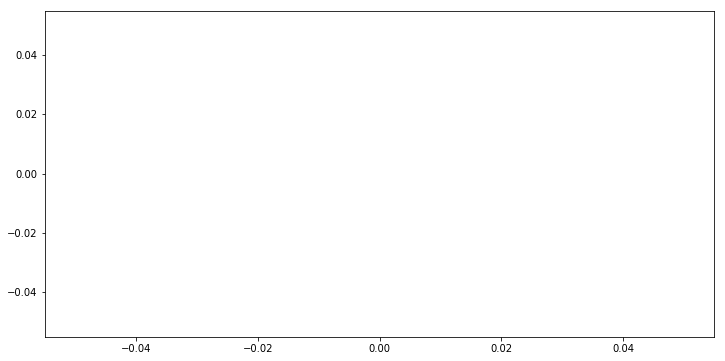

In [44]:
plt.figure(figsize=[12, 6])
sns.distplot(train_df['totals.pageviews'])
plt.xlabel('totals.pageviews', fontsize=15)
plt.ylabel('Distribution', fontsize=15)
plt.title('Total - Page Views', fontsize=15)
plt.show()

## Date Exploration

In [ ]:
train_df.head()

In [ ]:
plot_categorical(data=train_df, col='year', size=[10, 5], xlabel_angle=0, title='Year')

In [ ]:
color = sns.color_palette()

plt.figure(figsize=[12, 6])
train_df[train_df['totals.transactionRevenue'] > 0].yearmonth.value_counts().sort_index().plot('barh',color=color[0],figsize=(15,6))
plt.xlabel('Counts', fontsize=15)
plt.ylabel('Year_Month', fontsize=15)
plt.title('Number of transactions in different Months', fontsize=15)
plt.show()

In [ ]:
plt.figure(figsize=[12, 6])
train_df[train_df['totals.transactionRevenue'] > 0].day.value_counts().sort_index().plot('barh',color=color[0],figsize=(15,6))
plt.xlabel('Counts', fontsize=15)
plt.ylabel('Days (Mon-Sun)', fontsize=15)
plt.title('Number of transactions in different Days', fontsize=15)
plt.show()